In [43]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sys.path.append('../src')
from data_loader import get_coffee_sales_df

In [44]:
df = get_coffee_sales_df()

In [45]:
# Create hour column from the ORIGINAL datetime column
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

# Add month and year columns from the date column
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year





In [46]:
# Totals by coffee_name and month for 2025

monthly_totals = (
    df.loc[df['year'] == 2025]
    .groupby(['coffee_name', 'month'], as_index=False)['money']
    .sum()
    .rename(columns={'money': 'total_money'})
)

# Wide format: months as columns for easier viewing
monthly_pivot = (
    monthly_totals
    .pivot(index='coffee_name', columns='month', values='total_money')
    .fillna(0)
    .sort_index(axis=1)
)

# View results
display(monthly_totals.sort_values(['coffee_name', 'month']))
display(monthly_pivot)

,coffee_name,month,total_money
0,Americano,2,175.0
1,Americano,3,200.0
2,Americano with milk,2,600.0
3,Americano with milk,3,500.0
4,Cappuccino,2,270.0
5,Cappuccino,3,210.0
6,Caramel,3,22.0
7,Caramel coffee,2,28.0
8,Caramel coffee,3,28.0
9,Caramel with Irish whiskey,2,140.0


month,2,3
coffee_name,,
Americano,175.0,200.0
Americano with milk,600.0,500.0
Cappuccino,270.0,210.0
Caramel,0.0,22.0
Caramel coffee,28.0,28.0
Caramel with Irish whiskey,140.0,84.0
Caramel with chocolate,84.0,28.0
Caramel with milk,50.0,25.0
Chocolate,25.0,0.0


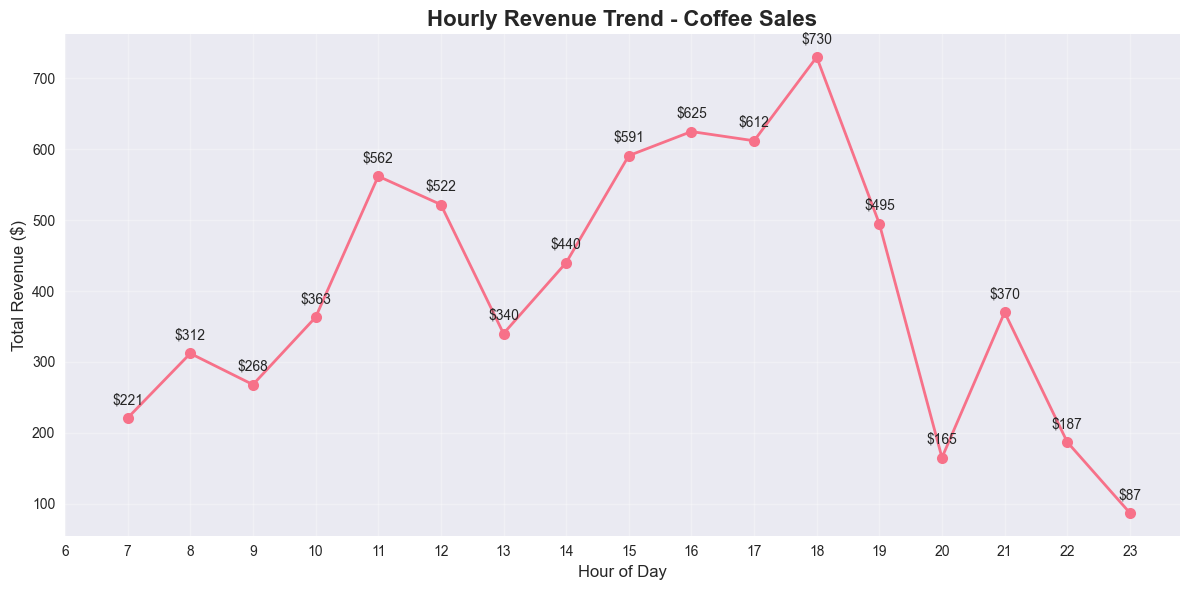

Hourly Revenue Summary:
    hour  money
0      7  221.0
1      8  312.0
2      9  268.0
3     10  363.0
4     11  562.0
5     12  522.0
6     13  340.0
7     14  440.0
8     15  591.0
9     16  625.0
10    17  612.0
11    18  730.0
12    19  495.0
13    20  165.0
14    21  370.0
15    22  187.0
16    23   87.0

Peak Revenue Hour: Hour 18.0 with $730.00


In [47]:
# set the style for better-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Group by hour and sum the money for each hour
hourly_money = df.groupby('hour')['money'].sum().reset_index()

# Create a trend chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_money['hour'], hourly_money['money'], marker='o', linewidth=2, markersize=8)

# Customise the chart
plt.title("Hourly Revenue Trend - Coffee Sales", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis to show hours from open to close
plt.xticks(range(6,24))

# Add value labels on the points 
for x, y in zip(hourly_money['hour'], hourly_money['money']):
    plt.annotate(f'${y:.0f}', (x, y), textcoords='offset points', xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Display the hourly revenue data 
print("Hourly Revenue Summary:")
print(hourly_money.sort_values('hour'))

# Find peak hours
peak_hour = hourly_money.loc[hourly_money['money'].idxmax()]
print(f"\nPeak Revenue Hour: Hour {peak_hour['hour']} with ${peak_hour['money']:.2f}")




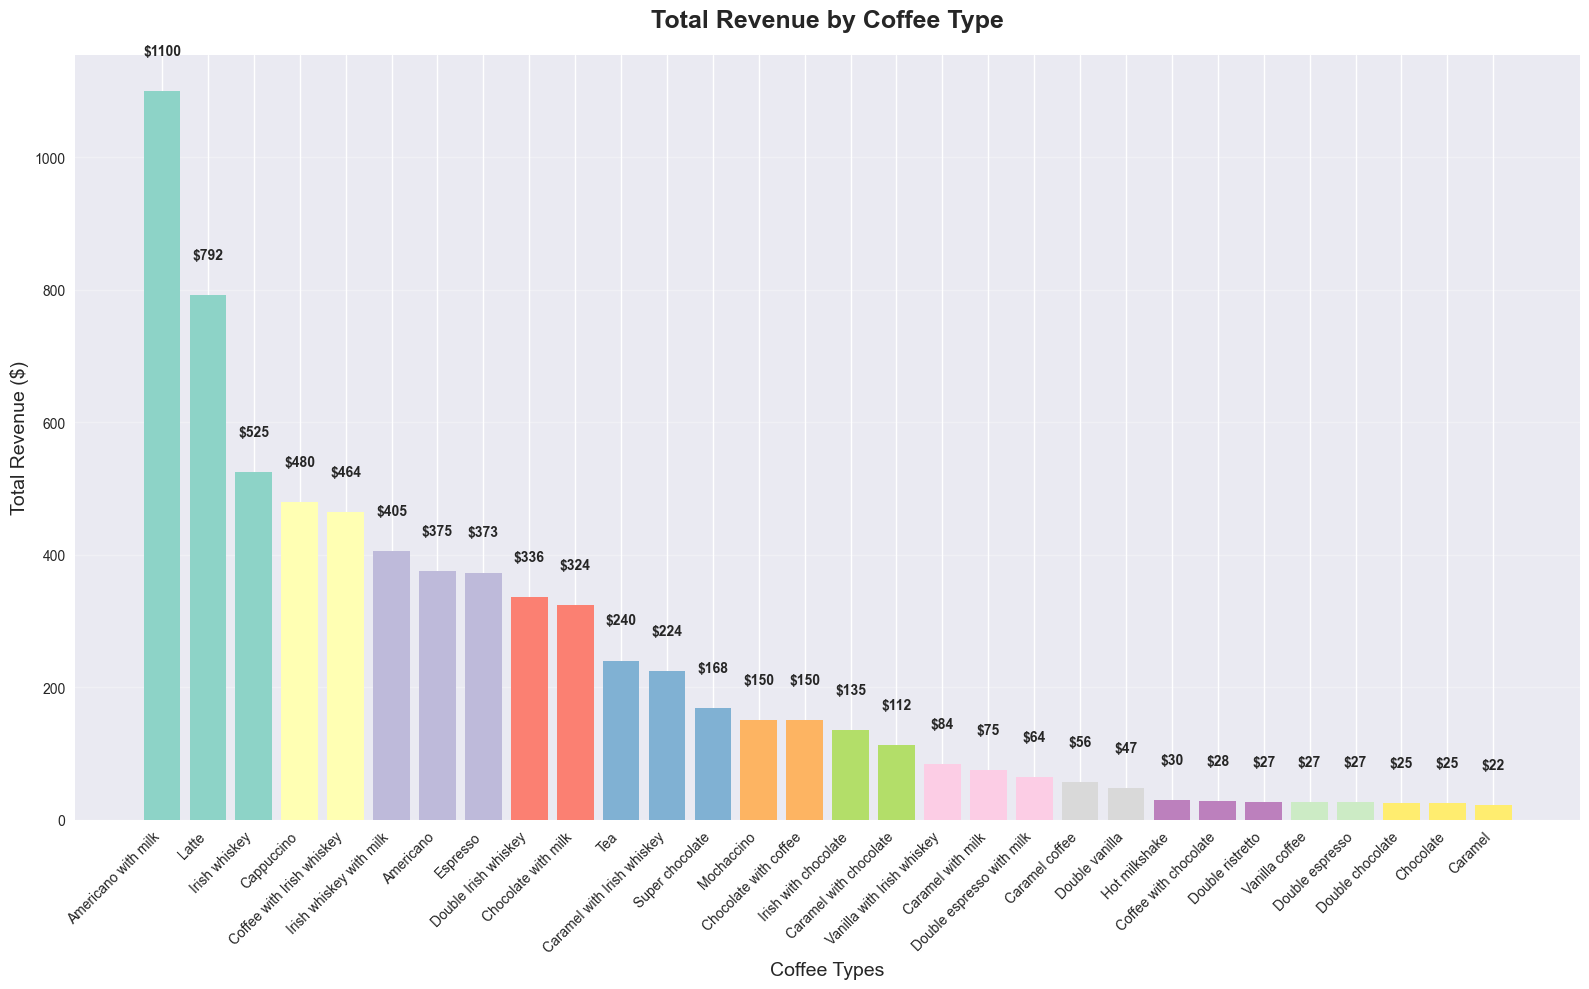

Coffee Revenue Summary
                  coffee_name   money
1         Americano with milk  1100.0
24                      Latte   792.0
21              Irish whiskey   525.0
2                  Cappuccino   480.0
11  Coffee with Irish whiskey   464.0


In [49]:
# Group by coffee_name and sum the money for each coffee
coffee_totals = df.groupby('coffee_name')['money'].sum().reset_index()

# Sort by money in descending order
coffee_totals = coffee_totals.sort_values('money', ascending=False)

# Create the bar chart
plt.figure(figsize=(16,10))
bars = plt.bar(range(len(coffee_totals)), coffee_totals['money'],
               color=plt.cm.Set3(np.linspace(0,1,len(coffee_totals))))

# Customise the chart
plt.title("Total Revenue by Coffee Type", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Coffee Types", fontsize=14)
plt.ylabel("Total Revenue ($)", fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# Set x-axis labels with rotation
plt.xticks(range(len(coffee_totals)), coffee_totals['coffee_name'], rotation=45, ha='right')

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, coffee_totals['money'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'${value:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Display the coffee revenue summary
print("Coffee Revenue Summary")
print(coffee_totals.head())

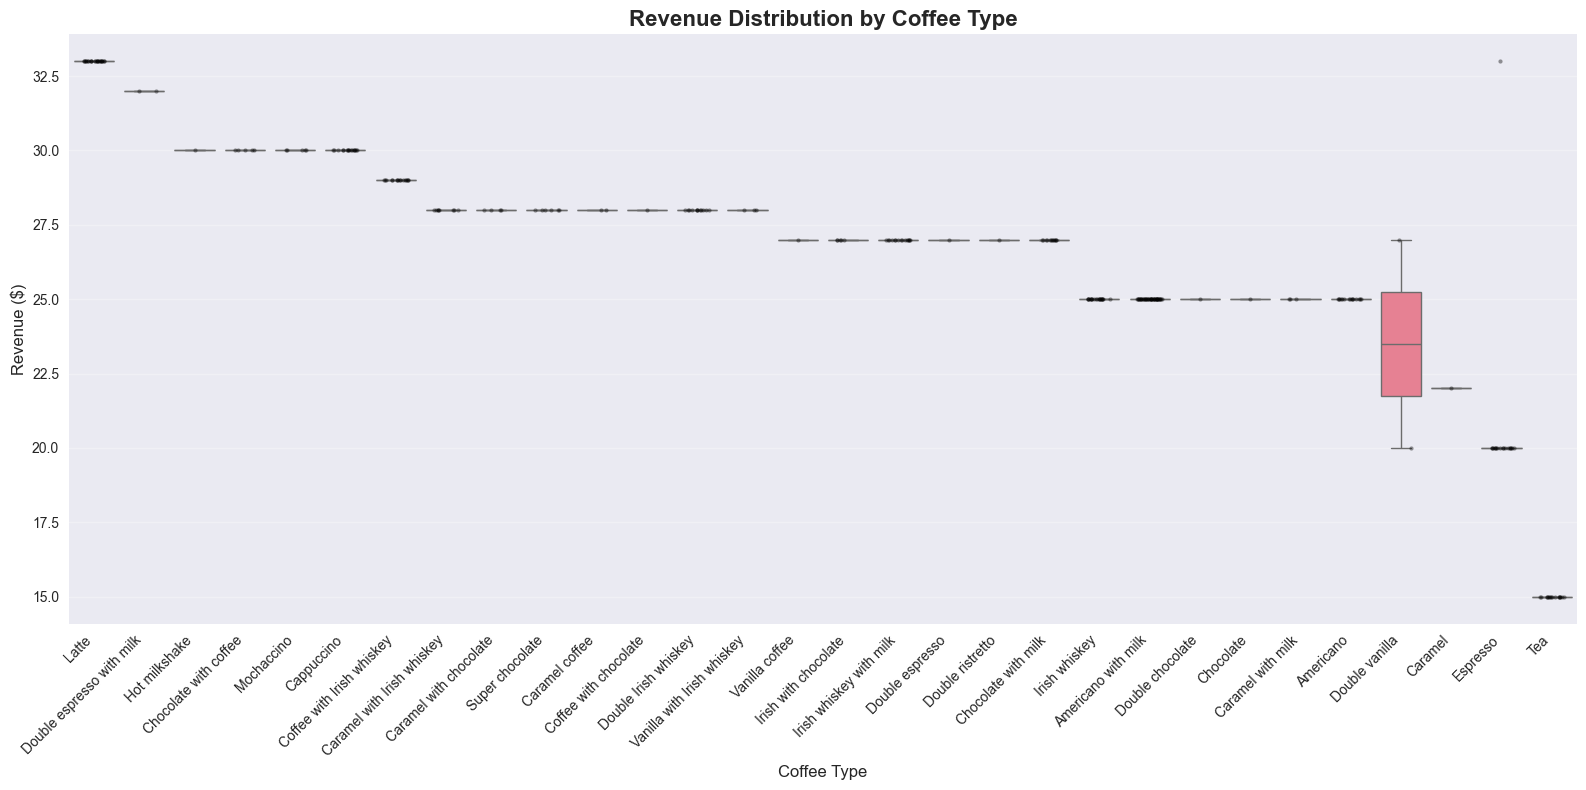

In [50]:
# Create a box plot
df_plot = df.copy()

order = (
    df_plot.groupby('coffee_name')['money']
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(16,8))
sns.boxplot(data=df_plot, x='coffee_name', y='money', order=order, showfliers=False)
sns.stripplot(data=df_plot, x='coffee_name', y='money', order=order,
              color='black', size=3, alpha=0.4, jitter=0.25)

plt.title("Revenue Distribution by Coffee Type", fontsize=16, fontweight='bold')
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()